In [1]:
import pandas as pd 
import numpy as np

In [44]:
data = pd.read_csv("weatherAUS.csv")

In [45]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [47]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [48]:
data['Date']= pd.to_datetime(data["Date"])

In [49]:
month=[]
for i in range(len(data['Date'])):
    month.append(int(data["Date"][i].month))
data['month'] = month

In [52]:
data.dropna(subset=['RainTomorrow', 'RainToday'], inplace=True) 

In [53]:
data.isna().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
month                0
dtype: int64

In [67]:
data['WindDir9am'].dropna().unique()
data['WindDir9am'].replace(list(data['WindDir9am'].dropna().unique()), np.arange(1,len(list(data['WindDir9am'].dropna().unique()))+1 ), inplace=True)
data['WindDir9am'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       nan, 14., 15., 16.])

In [70]:
change = ['Location','WindGustDir','WindDir3pm']
for i in change:
    data[i].dropna().unique()
    data[i].replace(list(data[i].dropna().unique()), np.arange(1,len(list(data[i].dropna().unique()))+1 ), inplace=True)
    data[i].unique()

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  int32         
 2   MinTemp        140319 non-null  float64       
 3   MaxTemp        140480 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81093 non-null   float64       
 6   Sunshine       73982 non-null   float64       
 7   WindGustDir    131624 non-null  float64       
 8   WindGustSpeed  131682 non-null  float64       
 9   WindDir9am     131127 non-null  float64       
 10  WindDir3pm     137117 non-null  float64       
 11  WindSpeed9am   139732 non-null  float64       
 12  WindSpeed3pm   138256 non-null  float64       
 13  Humidity9am    139270 non-null  float64       
 14  Humidity3pm    137286 non-null  float64       
 15  

In [76]:
data.replace(['Yes', 'No'], [1, 0], inplace=True)

In [74]:
import numpy as np
from sklearn.impute import KNNImputer

In [88]:
cclu = ['Location'     ,
'MinTemp'       ,    
'MaxTemp'        ,    
'Rainfall'        ,     
'Evaporation'     ,
'Sunshine'         ,
'WindGustDir'      ,
'WindGustSpeed'     ,
'WindDir9am'       ,
'WindDir3pm'       ,
'WindSpeed9am'     ,
'WindSpeed3pm'      ,
'Humidity9am'       ,
'Humidity3pm'       ,
'Pressure9am'      ,
'Pressure3pm'      ,
'Cloud9am'         ,
'Cloud3pm'         ,
'Temp9am'           ,
'Temp3pm'           ,
'RainToday'          , 
'RainTomorrow'       , 
'month'                ]

In [81]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
data = imputer.fit_transform(data.drop(["Date"],axis=1))

In [90]:
data_d = pd.DataFrame(data, columns = cclu)
data_d

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
0,1.0,13.4,22.9,0.6,2.466667,6.866667,1.0,44.0,1.0,1.0,...,22.0,1007.7,1007.1,8.000000,1.333333,16.9,21.8,0.0,0.0,12.0
1,1.0,7.4,25.1,0.0,4.333333,8.400000,2.0,44.0,2.0,2.0,...,25.0,1010.6,1007.8,1.333333,2.333333,17.2,24.3,0.0,0.0,12.0
2,1.0,12.9,25.7,0.0,4.933333,9.933333,3.0,46.0,1.0,2.0,...,30.0,1007.6,1008.7,0.666667,2.000000,21.0,23.2,0.0,0.0,12.0
3,1.0,9.2,28.0,0.0,5.200000,10.933333,4.0,24.0,3.0,3.0,...,16.0,1017.6,1012.8,1.333333,1.333333,18.1,26.5,0.0,0.0,12.0
4,1.0,17.5,32.3,1.0,3.166667,8.866667,1.0,41.0,4.0,4.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,49.0,3.5,21.8,0.0,4.400000,10.366667,15.0,31.0,12.0,3.0,...,27.0,1024.7,1021.2,0.666667,1.333333,9.4,20.9,0.0,0.0,6.0
140783,49.0,2.8,23.4,0.0,3.733333,9.666667,15.0,31.0,3.0,8.0,...,24.0,1024.6,1020.3,2.000000,1.000000,10.1,22.4,0.0,0.0,6.0
140784,49.0,3.6,25.3,0.0,3.200000,9.666667,5.0,22.0,3.0,13.0,...,21.0,1023.5,1019.1,0.000000,0.333333,10.9,24.5,0.0,0.0,6.0
140785,49.0,5.4,26.9,0.0,5.466667,9.300000,6.0,37.0,3.0,1.0,...,24.0,1021.0,1016.8,6.333333,4.000000,12.5,26.1,0.0,0.0,6.0


In [91]:
data_d.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
month            0
dtype: int64

In [93]:
data = data_d

In [94]:
X = data.drop(["RainTomorrow"],axis=1)
y = data['RainTomorrow']
print(X,y)

        Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
0            1.0     13.4     22.9       0.6     2.466667   6.866667   
1            1.0      7.4     25.1       0.0     4.333333   8.400000   
2            1.0     12.9     25.7       0.0     4.933333   9.933333   
3            1.0      9.2     28.0       0.0     5.200000  10.933333   
4            1.0     17.5     32.3       1.0     3.166667   8.866667   
...          ...      ...      ...       ...          ...        ...   
140782      49.0      3.5     21.8       0.0     4.400000  10.366667   
140783      49.0      2.8     23.4       0.0     3.733333   9.666667   
140784      49.0      3.6     25.3       0.0     3.200000   9.666667   
140785      49.0      5.4     26.9       0.0     5.466667   9.300000   
140786      49.0      7.8     27.0       0.0     5.933333  10.133333   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0               1.0           44.0         1.0         

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic regression 

In [102]:
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y_pred = classifierLR.predict(X_test)

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[25779  1527]
 [ 3987  3904]]


0.8433389209307611

knn

In [105]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [106]:
y_pred = classifier.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[25390  1916]
 [ 3960  3931]]


0.8330539534619428

SVM

In [108]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [109]:
y_pred = classifier.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[25974  1332]
 [ 4232  3659]]


0.841918345313521

In [112]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [113]:
y_pred = classifier.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[26199  1107]
 [ 4067  3824]]


0.8529988351279939

In [121]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [122]:
y_pred = classifier.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[23027  4279]
 [ 2788  5103]]


0.7992158422592834

In [161]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
y_pred = classifier.predict(X_test)

In [163]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[26112  1194]
 [ 3904  3987]]


0.8551581100661988

In [150]:
data.to_csv("DH.csv")

In [129]:
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

Using TensorFlow backend.


In [146]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 22))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 30, callbacks=[early_stopping], validation_split=0.2)

Train on 84472 samples, validate on 21118 samples
Epoch 1/30
84472/84472 [==============================] - 2s 28us/step - loss: 0.3627 - accuracy: 0.8438 - val_loss: 0.3384 - val_accuracy: 0.8527
Epoch 2/30
84472/84472 [==============================] - 2s 25us/step - loss: 0.3455 - accuracy: 0.8507 - val_loss: 0.3361 - val_accuracy: 0.8555
Epoch 3/30
84472/84472 [==============================] - 2s 25us/step - loss: 0.3421 - accuracy: 0.8528 - val_loss: 0.3334 - val_accuracy: 0.8577
Epoch 4/30
84472/84472 [==============================] - 2s 25us/step - loss: 0.3395 - accuracy: 0.8541 - val_loss: 0.3313 - val_accuracy: 0.8575
Epoch 5/30
84472/84472 [==============================] - 2s 26us/step - loss: 0.3379 - accuracy: 0.8549 - val_loss: 0.3326 - val_accuracy: 0.8577
Epoch 6/30
84472/84472 [==============================] - 2s 30us/step - loss: 0.3362 - accuracy: 0.8556 - val_loss: 0.3299 - val_accuracy: 0.8578
Epoch 7/30
84472/84472 [==============================] - 3s 30us/st

In [143]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [138]:
cf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8523169588317187
Precision Score : 0.7294257965581871
Recall Score : 0.5425167912812064
F1 Score : 0.6222383720930232


In [144]:
cf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8514646134613746
Precision Score : 0.7190327356473104
Recall Score : 0.5539221898365226
F1 Score : 0.6257695060844667


In [140]:
import matplotlib.pyplot as plt


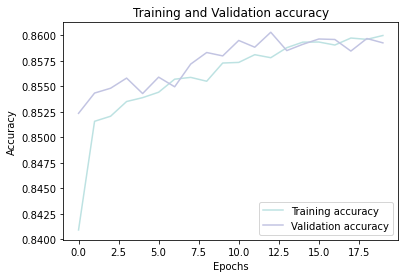

In [145]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [130]:
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.8433957439554507
Precision Score : 0.7190204382250046
Recall Score : 0.4948675706501077
F1 Score : 0.5862483110644048


array([[25780,  1526],
       [ 3986,  3905]], dtype=int64)

In [166]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [188]:
modell = LGBMClassifier(max_bin=1000,num_iterations=900)
modell.fit(X_train, y_train) 
  
# Predicting the Target variable 
y_pred = modell.predict(X_test) 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
accuracy = modell.score(X_train, y_train) 
print("training - ",accuracy)

Accuracy Score : 0.8621189305906753
training -  0.9310919594658585


In [185]:
accuracy = modell.score(X_train, y_train) 
print("training - ",accuracy)

training -  0.9611042712378066


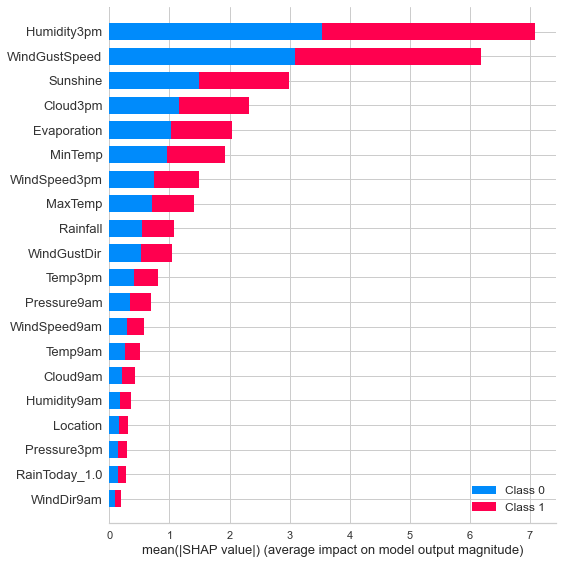

In [190]:
interpret_model(modell)

In [ ]:
interpret_model(modell,plot = 'reason')

In [191]:
cf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8621189305906753
Precision Score : 0.7582454947296838
Recall Score : 0.5652008617412242
F1 Score : 0.6476439410440717


In [206]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(modell,X_test,y_test,cv=5)


In [207]:
print(score.mean())

0.8531977682780354


In [208]:
score

array([0.85113636, 0.85340909, 0.85495099, 0.85594545, 0.85054695])

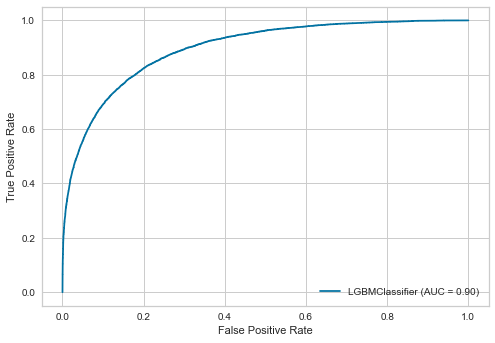

In [204]:
from sklearn import metrics
metrics.plot_roc_curve(modell,X_test,y_test)
plt.show()